In [1]:
import os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure as meas, feature as feat
import cv2 as cv
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
plt.style.use("seaborn")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (16/2, 9/2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

## Training data import & pre-processing

In [3]:
traindir = 'D:/Kenneth/Documents/VIP/Datasets/fruits-360/Training/'
savedir = 'D:/Kenneth/Documents/5-1/App Physics 186/Activity 16 - Support Vector Machines/'
class1dir = traindir + 'Banana/'
class2dir = traindir + 'Apple Red 1/'
class3dir = traindir + 'Orange/'

In [4]:
ban_a, ban_b, ban_ecc = [], [], []
man_a, man_b, man_ecc = [], [], []
ora_a, ora_b, ora_ecc = [], [], []
ass = [ban_a, man_a, ora_a]
bss = [ban_b, man_b, ora_b]
ecs = [ban_ecc, man_ecc, ora_ecc]
dirs = [class1dir, class2dir, class3dir]

for j in range(3):
    filenames = os.listdir(dirs[j])
    for i,f in enumerate(filenames):
        if i == 50:
            break
        img = cv.imread(dirs[j] + f)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        thres, out = cv.threshold(img_gray, 127, 255, cv.THRESH_OTSU)
        out = (img_gray < thres).astype(float)
        img_label = meas.label(out)
        props = meas.regionprops(img_label)
        ecc = props[0]['eccentricity']

        img_Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab).astype(float)
        img_Lab /= img_Lab[:,:,0].max()
        img_L, img_a, img_b = cv.split(img_Lab)

        ass[j].append(img_a.mean())
        bss[j].append(img_b.mean())
        ecs[j].append(ecc)

In [7]:
np.save(savedir + 'astar-ban_app_ora.npy', np.array(ass))
np.savetxt('astar-ban_app_ora.csv', np.array(ass), delimiter=',')
np.save(savedir + 'bstar-ban_app_ora.npy', np.array(bss))
np.savetxt('bstar-ban_app_ora.csv', np.array(bss), delimiter=',')
np.save(savedir + 'ecc-ban_app_ora.npy', np.array(ecs))
np.savetxt('ecc-ban_app_ora.csv', np.array(ecs), delimiter=',')

In [42]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=ban_a, 
            y=ban_b,
            z=ban_ecc,
            mode='markers',
            marker={
                'color': 'yellow',
            },
            name='banana'
        ),
        go.Scatter3d(
            x=man_a, 
            y=man_b,
            z=man_ecc,
            mode='markers',
            marker={
                'color': 'red',
            },
            name='apple',
        ),
        go.Scatter3d(
            x=ora_a, 
            y=ora_b,
            z=ora_ecc,
            mode='markers',
            marker={
              'color': 'orange',
            },
            name='orange',
        ),
    ]
)
fig.update_traces(
    showlegend=True,
    marker={
       'line': {
            'color': 'black',
            'width': 2,
        },
    }
)
fig.update_layout(
    margin={
        't': 0,
        'r': 0,
        'b': 0,
        'l': 0,
    },
    scene={
        'xaxis_title': 'a*',
        'yaxis_title': 'b*',
        'zaxis_title': 'eccentricity',
    },
)
fig.show()

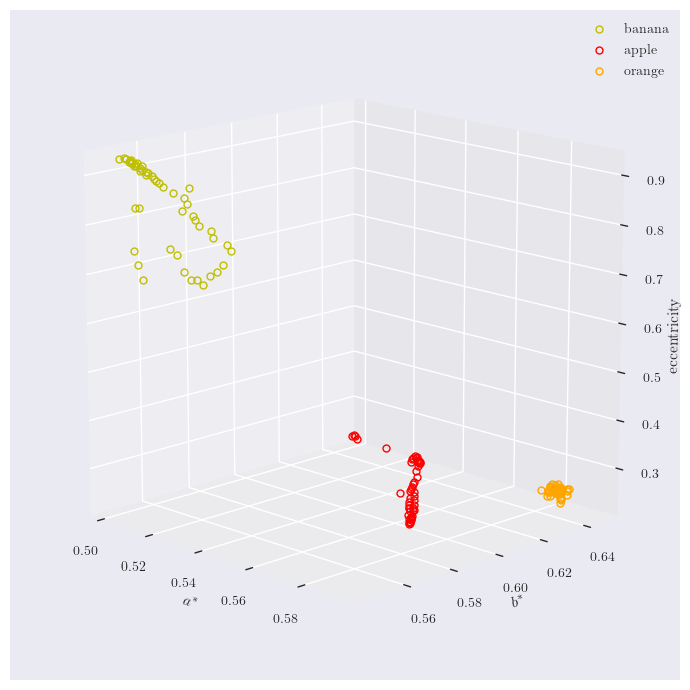

In [5]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=-45)
ax.plot(ban_a, ban_b, ban_ecc, 'yo', ms=5, mfc='None', mew=1, label='banana')
ax.plot(man_a, man_b, man_ecc, 'ro', ms=5, mfc='None', mew=1, label='apple')
ax.plot(ora_a, ora_b, ora_ecc, 'o', ms=5, mfc='None', mew=1, color='orange', label='orange')
ax.set_xlabel('$a^*$')
ax.set_ylabel('$b^*$')
ax.set_zlabel('eccentricity')
ax.legend()
plt.tight_layout()
plt.savefig('feature_space.png', dpi=300, bbox_inches='tight')
plt.show()

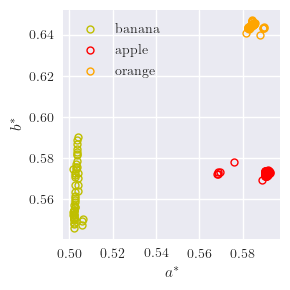

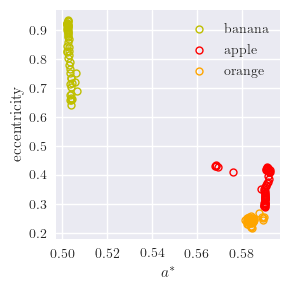

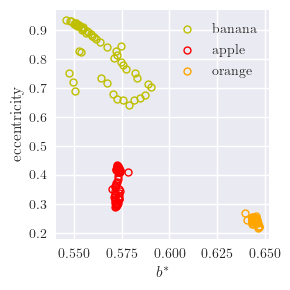

In [10]:
plt.figure(figsize=(3, 3))
plt.plot(ban_a, ban_b, 'yo', ms=5, mfc='None', mew=1, label='banana')
plt.plot(man_a, man_b, 'ro', ms=5, mfc='None', mew=1, label='apple')
plt.plot(ora_a, ora_b, 'o', ms=5, mfc='None', mew=1, color='orange', label='orange')
plt.xlabel('$a^*$')
plt.ylabel('$b^*$')
plt.legend()
plt.tight_layout()
plt.savefig('ab_space.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(3, 3))
plt.plot(ban_a, ban_ecc, 'yo', ms=5, mfc='None', mew=1, label='banana')
plt.plot(man_a, man_ecc, 'ro', ms=5, mfc='None', mew=1, label='apple')
plt.plot(ora_a, ora_ecc, 'o', ms=5, mfc='None', mew=1, color='orange', label='orange')
plt.xlabel('$a^*$')
plt.ylabel('eccentricity')
plt.legend()
plt.tight_layout()
plt.savefig('ae_space.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(3, 3))
plt.plot(ban_b, ban_ecc, 'yo', ms=5, mfc='None', mew=1, label='banana')
plt.plot(man_b, man_ecc, 'ro', ms=5, mfc='None', mew=1, label='apple')
plt.plot(ora_b, ora_ecc, 'o', ms=5, mfc='None', mew=1, color='orange', label='orange')
plt.xlabel('$b^*$')
plt.ylabel('eccentricity')
plt.legend()
plt.tight_layout()
plt.savefig('be_space.png', dpi=300, bbox_inches='tight')
plt.show()